<a href="https://colab.research.google.com/github/Barbhuiya12/Machine-Learning-/blob/main/Oil_and_Gas_Prediction%20%20Project_0.5%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Description
Use the following nonlinear correlation with unknown parameters A, B, C, and D.
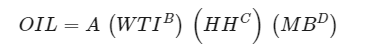

This particular nonlinear equation can be transformed to a linear equation with a log transformation as
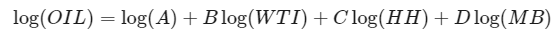

or kept in the original nonlinear form. Adjust the unknown parameters (A, B, C, D) to minimize a sum of squared errors of the normalized difference between the measured and predicted value. Normalize the difference by the measured value before the it is squared.

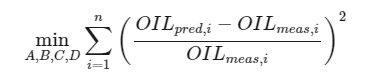

where n is the number of data points, i is an index for the current measured value, pred is the predicted value, and meas is the measured value. Report the parameter values, the R2 value of fit, and display a plot of the results.

In [1]:
pip install gekko

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.2 MB 7.5 MB/s 


**Library**

In [2]:
import numpy as np
from gekko import GEKKO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:

data = 'oil_data.txt'
df = pd.read_csv(data)

xm1 = np.array(df["WTI_PRICE"]) # WTI Oil Price
xm2 = np.array(df["HH_PRICE"])  # Henry Hub Gas Price
xm3 = np.array(df["NGL_PRICE"]) # MB Propane Spot Price
ym = np.array(df["BEST_PRICE"]) # oil sales price

In [19]:

# GEKKO model
m = GEKKO()
a = m.FV(lb=-100.0,ub=100.0)
b = m.FV(lb=-100.0,ub=100.0)
c = m.FV(lb=-100.0,ub=100.0)
d = m.FV(lb=-100.0,ub=100.0)
x1 = m.Param(value=xm1)
x2 = m.Param(value=xm2)
x3 = m.Param(value=xm3)
z = m.Param(value=ym)
y = m.Var()
m.Equation(y==a*(x1**b)*(x2**c)*(x3**d))
m.Minimize(((y-z)/z)**2)
# Options
a.STATUS = 1
b.STATUS = 1
c.STATUS = 1
d.STATUS = 1
m.options.IMODE = 2
m.options.SOLVER = 1
# Solve
m.solve()

apm 34.125.5.208_gk_model1 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            9
   Intermediates:            0
   Connections  :            0
   Equations    :            2
   Residuals    :            2
 
 Number of state variables:            157
 Number of total equations: -          153
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :              4
 
 ----------------------------------------------
 Model Parameter Estimation with APOPT Solver
 ----------------------------------------------
 
 Iter    Objective  Convergence
    0  1.52716E+02  0.00000E+00
    1  9.28039E+01  0.00000E+00
    2  4.64819E+01  0.00000E+00
  

In [5]:
print('a: ', a.value[0])
print('b: ', b.value[0])
print('c: ', c.value[0])
print('d: ', d.value[0])

cFormula = "Formula is : " + "\n" + \
           r"$A * WTI^B * HH^C * PROPANE^D$"

from scipy import stats
slope, intercept, r_value, p_value, \
       std_err = stats.linregress(ym,y)

r2 = r_value**2
cR2 = "R^2 correlation = " + str(r_value**2)
print(cR2)

a:  1.0439650141
b:  0.97701000027
c:  0.02361794484
d:  0.022456749877
R^2 correlation = 0.9964347959053697


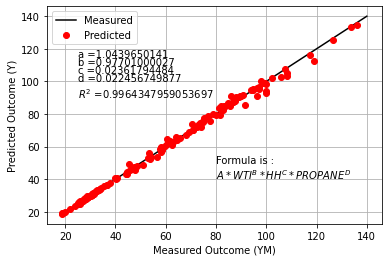

In [6]:
plt.figure(1)
plt.plot([20,140],[20,140],'k-',label='Measured')
plt.plot(ym,y,'ro',label='Predicted')
plt.xlabel('Measured Outcome (YM)')
plt.ylabel('Predicted Outcome (Y)')
plt.legend(loc='best')
plt.text(25,115,'a =' + str(a.value[0]))
plt.text(25,110,'b =' + str(b.value[0]))
plt.text(25,105,'c =' + str(c.value[0]))
plt.text(25,100,'d =' + str(d.value[0]))
plt.text(25,90,r'$R^2$ =' + str(r_value**2))
plt.text(80,40,cFormula)
plt.grid(True)
plt.show()

### **Another Method of Prediction**

In [7]:
import numpy as np
from scipy.optimize import minimize
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('oil_data.txt')

xm1 = np.array(df["WTI_PRICE"])  # WTI Oil Price
xm2 = np.array(df["HH_PRICE"])   # Henry Hub Gas Price
xm3 = np.array(df["NGL_PRICE"])  # MB Propane Spot Price
ym = np.array(df["BEST_PRICE"])  # oil sales price received (outcome)


In [11]:
# calculate y
def calc_y(x):
    a = x[0]
    b = x[1]
    c = x[2]
    d = x[3]
    #y = a * xm1 + b  # linear regression
    y = a * ( xm1 ** b ) * ( xm2 ** c ) * ( xm3 ** d )
    return y


In [12]:
def objective(x):
    # calculate y
    y = calc_y(x)
    # calculate objective
    obj = 0.0
    for i in range(len(ym)):
        obj = obj + ((y[i]-ym[i])/ym[i])**2    
    # return result
    return obj

In [13]:
x0 = np.zeros(4)
x0[0] = 0.0 # a
x0[1] = 0.0 # b
x0[2] = 0.0 # c
x0[3] = 0.0 # d

In [14]:
my_bnds = (-100.0, 100.0)
bnds = (my_bnds, my_bnds, my_bnds, my_bnds)
solution = minimize(objective, x0, method='SLSQP', bounds=bnds)
x = solution.x
y = calc_y(x)

In [15]:
# show final objective
cObjective = 'Final Objective: ' + str(objective(x))
print(cObjective)

# print solution
print('Solution')

cA = 'A = ' + str(x[0])
print(cA)
cB = 'B = ' + str(x[1])
print(cB)
cC = 'C = ' + str(x[2])
print(cC)
cD = 'D = ' + str(x[3])
print(cD)


Final Objective: 0.07875701492605859
Solution
A = 1.0439192379591626
B = 0.9770143840519273
C = 0.02362956587948599
D = 0.022460496185909357


R^2 correlation = 0.9964353047694963


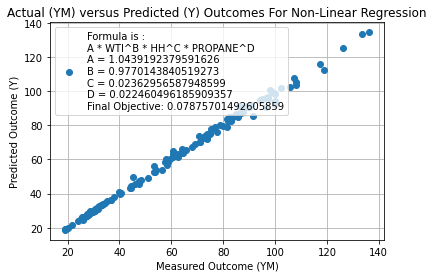

In [16]:
cFormula = "Formula is : " + "\n" \
           + "A * WTI^B * HH^C * PROPANE^D"
cLegend = cFormula + "\n" + cA + "\n" + cB + "\n" \
           + cC + "\n" + cD + "\n" + cObjective

#ym measured outcome
#y  predicted outcome

from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(ym,y)
r2 = r_value**2
cR2 = "R^2 correlation = " + str(r_value**2)
print(cR2)

# plot solution
plt.figure(1)
plt.title('Actual (YM) versus Predicted (Y) Outcomes For Non-Linear Regression')
plt.plot(ym,y,'o')
plt.xlabel('Measured Outcome (YM)')
plt.ylabel('Predicted Outcome (Y)')
plt.legend([cLegend])
plt.grid(True)
plt.show()